# Постановка задачи 

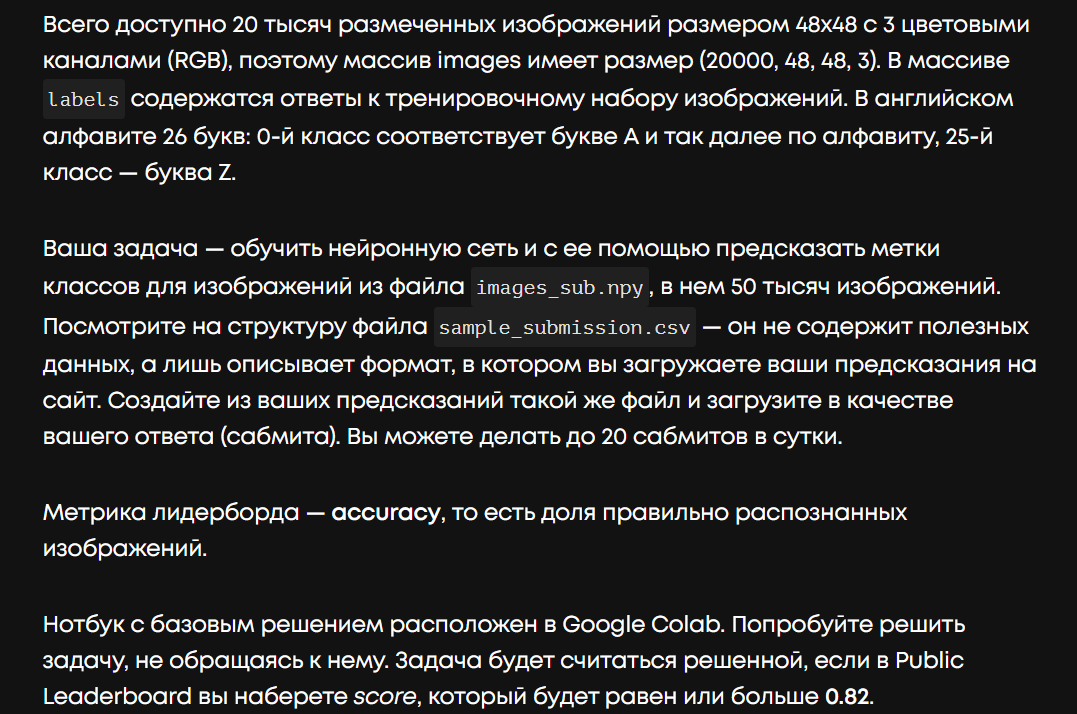


In [1]:
# Подключаем библиотек

import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

import matplotlib.pyplot as plt
import pandas as pd




In [2]:
# Загрузка файлов 
images = np.load('F:/MIFI-github/HW Advance DL/Data/images.npy')
labels = np.load('F:/MIFI-github/HW Advance DL/Data/labels.npy')
images_sub = np.load('F:/MIFI-github/HW Advance DL/Data/images_sub.npy')

In [3]:
# Проверка размеров массивов
print(f"Размер массива images: {images.shape}")
print(f"Размер массива labels: {labels.shape}")
print(f"Размер массива images_sub: {images_sub.shape}")

Размер массива images: (20000, 48, 48, 3)
Размер массива labels: (20000,)
Размер массива images_sub: (50000, 48, 48, 3)


В массиве images находится 20 000 изображений размерами 48x48 c 3 каналами цвета.
В массиве labels находится 20 000 метод для изображений для изображений images
В массиве igames_sub находится 50 000 изображений размерами 48x48 c 3 каналами цвета.

# Предобработка данных
Нормализуйте изображения, преобразуйте метки классов в one-hot encoding и разделите данные на тренировочный и валидационный наборы.

In [4]:
# Нормализация изображений и преобразование меток в one-hot encoding

# Нормализация изображений
images = images / 255.0
images_sub = images_sub / 255.0

# Преобразование меток классов в one-hot encoding в 26 классов по числу букв в алфавите
labels_one_hot = to_categorical(labels, num_classes=26)

# Разделение данных на тренировочный и проверочный датасет 
X_train, X_val, y_train, y_val = train_test_split(images, labels_one_hot, test_size=0.2, random_state=42)

print(f"Размер тренировочного набора: {X_train.shape}, {y_train.shape}")
print(f"Размер валидационного набора: {X_val.shape}, {y_val.shape}")

Размер тренировочного набора: (16000, 48, 48, 3), (16000, 26)
Размер валидационного набора: (4000, 48, 48, 3), (4000, 26)


# Создание модели


In [5]:
# Архитектура модели

model = Sequential([
	Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 3)),
	Conv2D(64, (3, 3), activation='relu'),
	MaxPooling2D((2, 2)),
	Dropout(0.25),
	Conv2D(128, (3, 3), activation='relu'),
	Conv2D(128, (3, 3), activation='relu'),
	MaxPooling2D((2, 2)),
	Dropout(0.25),
	Flatten(),
	Dense(256, activation='relu'),
	Dropout(0.6),
	Dense(26, activation='softmax')
])

# Компиляция модели с параметрами: оптимизатор Adam, функция потерь categorical_crossentropy, метрика accuracy
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Арахитектура модели
model.summary()

C:\Users\Eve\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 44, 44, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 20, 20, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 10368)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,654,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 26)             │         6,682 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,921,306 (11.14 MB)

 Trainable params: 2,921,306 (11.14 MB)

 Non-trainable params: 0 (0.00 B)

# Обучение модели


In [6]:
# Обучение модели
# Параметры обучения количество эпох: 17, размер батча: 64

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val)
)



Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 51s 99ms/step - accuracy: 0.0470 - loss: 3.2506 - val_accuracy: 0.1655 - val_loss: 2.9799
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 49s 97ms/step - accuracy: 0.1765 - loss: 2.8325 - val_accuracy: 0.4627 - val_loss: 1.8644
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 49s 99ms/step - accuracy: 0.4093 - loss: 2.0017 - val_accuracy: 0.6270 - val_loss: 1.2952
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 52s 103ms/step - accuracy: 0.5134 - loss: 1.6004 - val_accuracy: 0.6800 - val_loss: 1.1429
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 51s 102ms/step - accuracy: 0.5721 - loss: 1.3815 - val_accuracy: 0.7063 - val_loss: 0.9932
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 58s 115ms/step - accuracy: 0.6162 - loss: 1.2374 - val_accuracy: 0.7355 - val_loss: 0.8941
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 51s 103ms/step - accuracy: 0.6546 - loss: 1.1220 - val_accuracy: 0.7538 - val_loss: 0.8372
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 52s 103ms/step - accuracy: 0.6771 - loss: 1.01

# Проверка качества модели, построение графиков


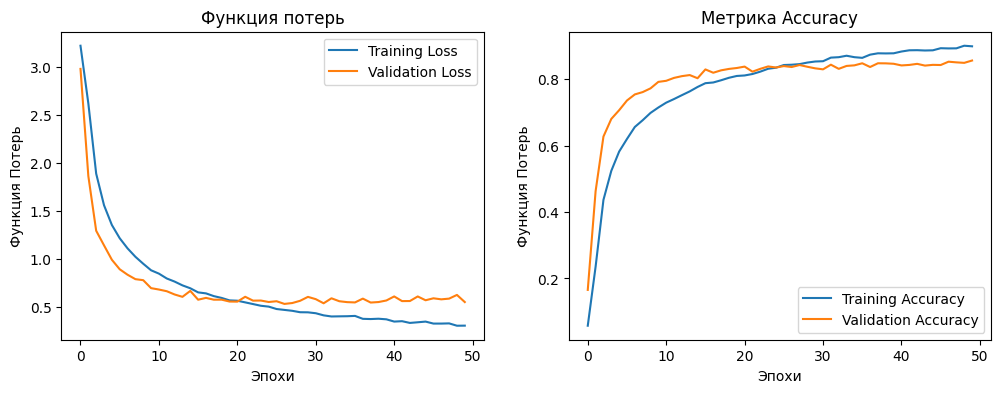

In [7]:
# Визуализация результатов обучения 
plt.figure(figsize=(12, 4))

# Функция потерь
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Функция потерь')
plt.xlabel('Эпохи')
plt.ylabel('Функция Потерь')
plt.legend()

# Метрика Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Метрика Accuracy')
plt.xlabel('Эпохи')
plt.ylabel('Функция Потерь')
plt.legend()

plt.show()

# Использование модели для предсказания


In [8]:
# Предсказание на основе данны из файла images_sub.npy

# Предсказания
predictions = model.predict(images_sub)
predicted_classes = predictions.argmax(axis=1)

# Создание файла ответов (submission)
submission = pd.DataFrame({
    'Id': range(len(predicted_classes)),
    'Category': predicted_classes
})
submission.to_csv('sample_submission001.csv', index=False)

print("Файл сабмита сохранен как sample_submission001.csv")

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step
Файл сабмита сохранен как sample_submission001.csv


### Итог
В результате экспериементов с архитектрурой модели, были полуены следующие результаты 

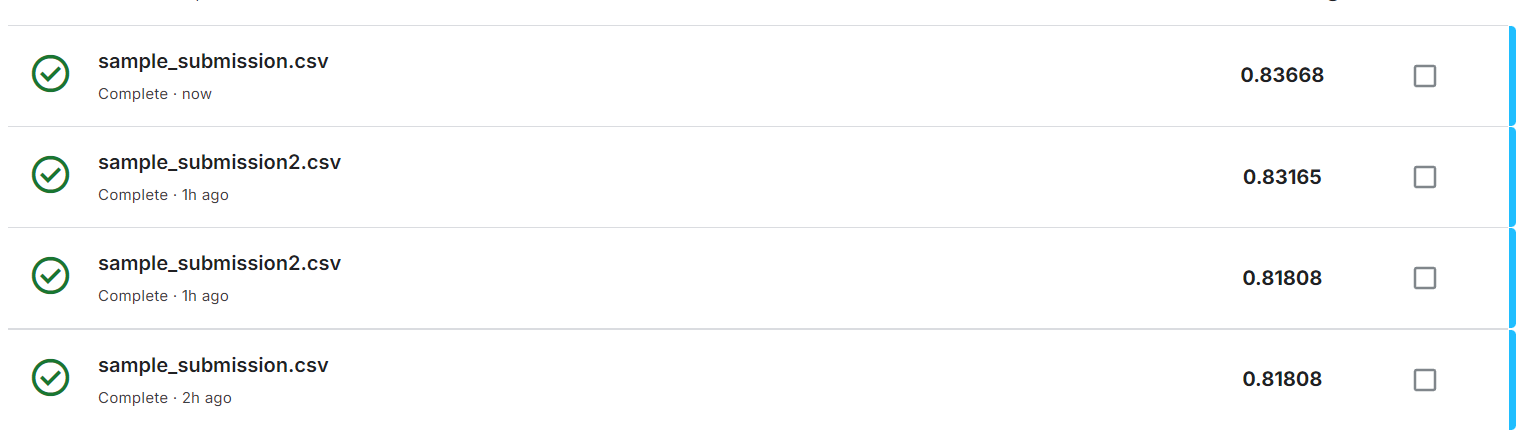